In [1]:
import pandas as pd
import seaborn as sns
import csv

%matplotlib inline

In [2]:
df=pd.read_feather('data.feather')
input_df=pd.read_csv('../cities.csv', sep=';', quoting=csv.QUOTE_NONNUMERIC, quotechar='\'')

df['Höhe_Diff'] = df.Höhe_Max-df.Höhe_Min
#df = df[df['Distanz'] > 0.75]
df = df[~df.Richtung.str.contains('turnaround')]



In [3]:
pd.pivot_table(data=df,
                           values=["Kurvigkeit", "Distanz", 'Höhe_Diff'],
                           index=["Stadt", 'Spurweite'],
                           aggfunc={'Kurvigkeit': ('mean', 'max'), 'Distanz': ('sum', 'mean'), 'Höhe_Diff':'mean'})

Distanz                Höhe_Diff  Kurvigkeit  \
                                 mean          sum        mean         max   
Stadt            Spurweite                                                   
Amsterdam        1435.0      8.847885   265.436559   13.566667  297.508978   
Augsburg         1000.0      7.076302   226.441670   24.406250  303.677704   
Basel            1000.0      7.355161   382.468382   42.442308  364.004982   
Berlin           1000.0     10.914380    10.914380   34.000000  130.719676   
                 1435.0     11.229230  1111.693794   21.232323  227.293825   
Bern             1000.0      7.169511    86.034134   52.750000  488.748713   
Bordeaux         1435.0     12.924752   258.495034   28.500000  166.050202   
Bremen           1435.0     12.540078   601.923757   16.895833  261.699790   
Brno             1435.0     10.323136   289.047807   61.642857  281.697099   
Brüssel          1435.0      8.663693   346.547704   62.525000  274.169336   
Budapest         1435.0     11.448973  1717.345995   37.706667  324.222342   
Chemnitz         1435.0      6.533365    65.333652   63.900000  251.682817   
Dresden          1450.0     16.635839   515.711005   63.225806  195.329223   
Essen            1000.0      9.760625   234.254990   71.416667  234.992166   
Gmunden          1000.0      2.828363     5.656726   71.000000  355.543034   
Graz             1435.0      7.774798   108.847177   33.714286  364.945739   
Göteborg         1435.0     17.069418   409.666024   82.708333  301.876643   
Halle (Saale)    1000.0      9.016613   414.764214   34.869565  289.872947   
Helsinki         1000.0      9.869669   276.350735   25.928571  483.959457   
Innsbruck        1000.0      6.223142    87.123982   55.785714  397.134759   
Krefeld          1000.0     10.677312    85.418494   12.250000  157.961245   
Köln             1435.0      4.077005    57.078069   11.500000  206.953197   
Leipzig          1458.0     12.506834   525.287012   23.261905  180.968352   
Linz             900.0      13.335696   160.028352   71.916667  400.485393   
Luxembourg       1435.0     20.172056    40.344112  117.000000  138.938406   
Lyon             1435.0      6.292745   113.269411   27.666667  219.559259   
Mailand          1445.0      9.257184   324.001435   25.771429  272.220546   
Manchester       1435.0      0.029474     0.147371    2.800000   18.035468   
München          1435.0      8.583993   394.863670   24.478261  329.769488   
Nürnberg         1435.0      7.353534   132.363619   24.666667  357.422329   
Portland         1435.0     20.614122   288.597701  115.857143  253.830019   
Potsdam          1435.0      8.066611   298.464600   16.378378  227.293825   
Prag             1435.0     16.330726  1224.804444  134.720000  354.683629   
San Francisco    1067.0      2.679947    16.079681   92.000000  168.294883   
                 1435.0     11.644135   163.017889  149.071429  125.743857   
Sankt Petersburg 1524.0     10.787613   938.522336   52.114943  179.101337   
Stuttgart        1000.0      4.642760    23.213799  187.800000  374.348983   
                 1435.0     15.301820   535.563700  159.914286  181.962751   
Toronto          1495.0      9.828707   294.861209   45.566667  338.215548   
Ulm              1000.0     10.084432    40.337727  127.000000  254.134483   
Wien             1435.0      7.660184   543.873080   48.802817  341.438137   
Zwickau          1000.0      6.513955    78.167460   66.916667  266.963707   
Zürich           1000.0      8.040469   353.780635   89.659091  457.114292   

                                        
                                  mean  
Stadt            Spurweite              
Amsterdam        1435.0     182.608198  
Augsburg         1000.0     191.251449  
Basel            1000.0     214.485652  
Berlin           1000.0     130.719676  
                 1435.0     131.661463  
Bern             1000.0     255.148331  
Bordeaux         1435.0     124.857571  
Bremen           1435.0     159

In [4]:
pd.pivot_table(data=df, values=["Kurvigkeit", "Distanz"], index="Spurweite", aggfunc='mean')

,Distanz,Kurvigkeit
Spurweite,,
900.0,13.335696,194.605447
1000.0,8.115941,211.196357
1067.0,2.679947,99.082361
1435.0,11.042765,146.085109
1445.0,9.257184,179.382833
1450.0,16.635839,144.369407
1458.0,12.506834,130.636637
1495.0,9.828707,139.291147
1524.0,10.787613,99.442751


<Axes: xlabel='Spurweite', ylabel='Kurvigkeit'>

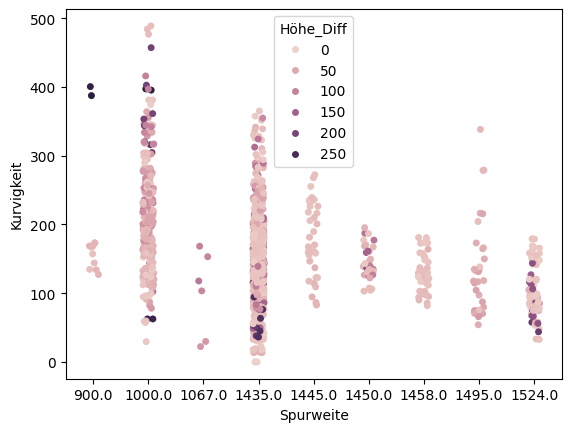

In [5]:
sns.stripplot(data=df, y='Kurvigkeit', x='Spurweite', orient='v', hue='Höhe_Diff')


<Axes: xlabel='Kurvigkeit', ylabel='Stadt'>

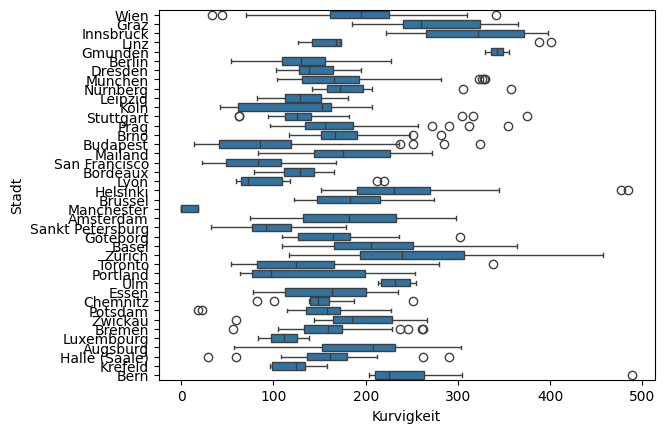

In [6]:
sns.boxplot(data=df, x='Kurvigkeit', y='Stadt', orient='h')

<Axes: xlabel='Kurvigkeit', ylabel='Geschwindigkeit'>

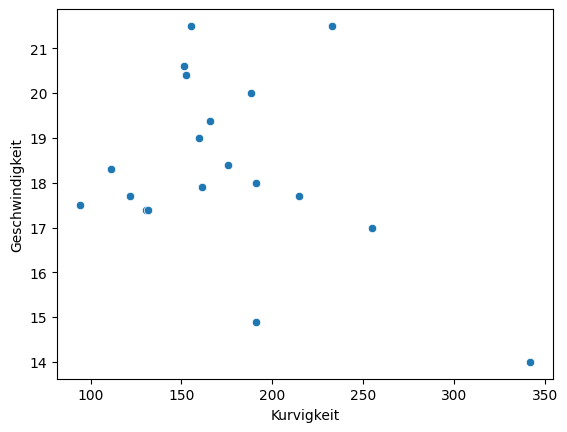

In [7]:
pt_cities=pd.pivot_table(data=df,
                           values=["Kurvigkeit", "Distanz"],
                           index=["Stadt", 'Spurweite'],
                           aggfunc={'Kurvigkeit': 'mean', 'Distanz': 'mean'})
merged_df=pd.merge(pt_cities, input_df, on='Stadt').drop(['Sued', 'West', 'Ost', 'Nord' ,'RailModes'], axis='columns')
sns.scatterplot(data=merged_df, x='Kurvigkeit', y='Geschwindigkeit')

In [8]:
merged_df

,Stadt,Distanz,Kurvigkeit,Geschwindigkeit
0,Amsterdam,8.847885,182.608198,NaN
1,Augsburg,7.076302,191.251449,18.00
2,Basel,7.355161,214.485652,17.70
3,Berlin,10.914380,130.719676,17.40
4,Berlin,11.229230,131.661463,17.40
5,Bern,7.169511,255.148331,17.00
6,Bordeaux,12.924752,124.857571,NaN
7,Bremen,12.540078,159.544242,19.00
8,Brno,10.323136,176.538427,NaN
9,Brüssel,8.663693,183.460744,NaN


In [9]:
df[df.Kurvigkeit == df.Kurvigkeit.max()]

,Stadt,Linie,Richtung,Distanz,Kurvigkeit,Spurweite,Höhe_Max,Höhe_Min,Höhe_Diff
1408,Bern,3,Tram 3: Bahnhof → Weissenbühl,2.060129,488.748713,1000.0,551.0,528.0,23.0


<Axes: xlabel='Kurvigkeit', ylabel='Stadt'>

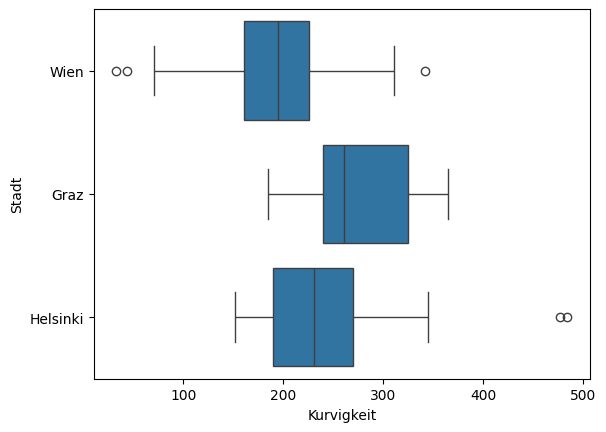

In [10]:
sns.boxplot(data=df[df.Stadt.isin(['Helsinki','Wien','Graz'])], x='Kurvigkeit', y='Stadt', orient='h')

In [11]:
df.sort_values('Höhe_Diff', ascending=False)

,Stadt,Linie,Richtung,Distanz,Kurvigkeit,Spurweite,Höhe_Max,Höhe_Min,Höhe_Diff
105,Linz,50,50: Hauptplatz - Pöstlingberg,4.102335,387.353725,900.0,534.0,254.0,280.0
91,Innsbruck,6,Tram 6: Innsbruck Bergisel => Igls,8.370567,395.374486,1000.0,866.0,589.0,277.0
92,Innsbruck,6,Tram 6: Igls Bahnhof => Innsbruck Bergisel,8.369431,397.134759,1000.0,866.0,589.0,277.0
102,Linz,50,50: Pöstlingberg – Hauptplatz,4.098598,400.485393,900.0,534.0,262.0,272.0
413,Stuttgart,U12,U12: Dürrlewang => Remseck,23.950971,120.058973,1435.0,473.0,204.0,269.0
...,...,...,...,...,...,...,...,...,...
1216,Chemnitz,C14,ChemnitzBahn C14: Mittweida => Thalheim,NaN,NaN,NaN,NaN,NaN,NaN
1217,Chemnitz,C15,"ChemnitzBahn C15: Hainichen, Bahnhof => Chemni...",NaN,NaN,NaN,NaN,NaN,NaN
1218,Chemnitz,C13,ChemnitzBahn C13: Burgstädt => Aue (Sachsen),NaN,NaN,NaN,NaN,NaN,NaN
1416,Bern,308,,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Kurvigkeit', ylabel='Höhe_Diff'>

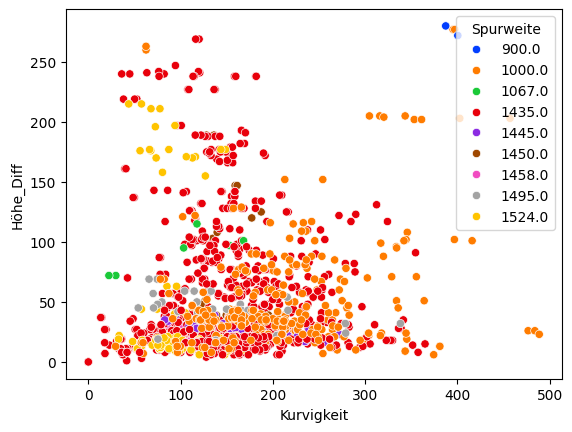

In [12]:
sns.scatterplot(data = df, x='Kurvigkeit', y='Höhe_Diff', hue='Spurweite', palette='bright')

<Axes: xlabel='Spurweite', ylabel='Höhe_Diff'>

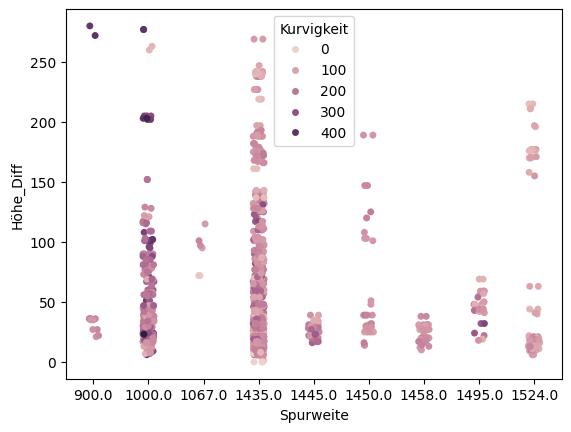

In [13]:
sns.stripplot(data = df, x='Spurweite', y='Höhe_Diff', hue='Kurvigkeit')

In [14]:
pd.pivot_table(data=df,
                           values=["Kurvigkeit", "Distanz", 'Höhe_Diff'],
                           index=["Stadt"],
                           aggfunc={'Kurvigkeit': ('mean', 'max'), 'Distanz': ('sum', 'mean'), 'Höhe_Diff':'mean'})

Distanz                Höhe_Diff  Kurvigkeit            
                       mean          sum        mean         max        mean
Stadt                                                                       
Amsterdam          8.847885   265.436559   13.566667  297.508978  182.608198
Augsburg           7.076302   226.441670   24.406250  303.677704  191.251449
Basel              7.355161   382.468382   42.442308  364.004982  214.485652
Berlin            11.226082  1122.608174   21.360000  227.293825  131.652046
Bern               7.169511    86.034134   52.750000  488.748713  255.148331
Bordeaux          12.924752   258.495034   28.500000  166.050202  124.857571
Bremen            12.540078   601.923757   16.895833  261.699790  159.544242
Brno              10.323136   289.047807   61.642857  281.697099  176.538427
Brüssel            8.663693   346.547704   62.525000  274.169336  183.460744
Budapest          11.448973  1717.345995   37.706667  324.222342   93.948074
Chemnitz           6.533365    65.333652   63.900000  251.682817  151.341864
Dresden           16.635839   515.711005   63.225806  195.329223  144.369407
Essen              9.760625   234.254990   71.416667  234.992166  155.461065
Gmunden            2.828363     5.656726   71.000000  355.543034  342.188275
Graz               7.774798   108.847177   33.714286  364.945739  273.391905
Göteborg          17.069418   409.666024   82.708333  301.876643  164.724459
Halle (Saale)      9.016613   414.764214   34.869565  289.872947  161.130249
Helsinki           9.869669   276.350735   25.928571  483.959457  247.812745
Innsbruck          6.223142    87.123982   55.785714  397.134759  315.797609
Krefeld           10.677312    85.418494   12.250000  157.961245  121.466024
Köln               4.077005    57.078069   11.500000  206.953197  122.362295
Leipzig           12.506834   525.287012   23.261905  180.968352  130.636637
Linz              13.335696   160.028352   71.916667  400.485393  194.605447
Luxembourg        20.172056    40.344112  117.000000  138.938406  111.074700
Lyon               6.292745   113.269411   27.666667  219.559259   95.606500
Mailand            9.182197   330.559103   25.500000  272.220546  179.456099
Manchester         0.029474     0.147371    2.800000   18.035468    7.214187
München            8.583993   394.863670   24.478261  329.769488  175.388643
Nürnberg           7.353534   132.363619   24.666667  357.422329  190.239938
Portland          20.614122   288.597701  115.857143  253.830019  134.711850
Potsdam            8.066611   298.464600   16.378378  227.293825  152.562372
Prag              16.330726  1224.804444  134.720000  354.683629  165.834875
San Francisco      8.954879   179.097570  131.950000  168.294883   83.905982
Sankt Petersburg  10.787613   938.522336   52.114943  179.101337   99.442751
Stuttgart         13.868403   568.604507  161.195122  374.348983  139.745722
Toronto            9.828707   294.861209   45.566667  338.215548  139.291147
Ulm               10.084432    40.337727  127.000000  254.134483  232.666375
Wien               7.660184   543.873080   48.802817  341.438137  191.258164
Zwickau            6.513955    78.167460   66.916667  266.963707  188.197899
Zürich             8.040469   353.780635   89.659091  457.114292  251.042241

In [15]:
df.mean(0, numeric_only=True)

Distanz         10.486598
Kurvigkeit     157.288402
Spurweite     1344.750560
Höhe_Max       199.243102
Höhe_Min       147.799403
Höhe_Diff       51.443699
dtype: float64

In [15]:
df.mean(0, numeric_only=True)

Distanz         10.486598
Kurvigkeit     157.288402
Spurweite     1344.750560
Höhe_Max       199.243102
Höhe_Min       147.799403
Höhe_Diff       51.443699
dtype: float64

<Axes: xlabel='Höhe_Diff', ylabel='Kurvigkeit'>

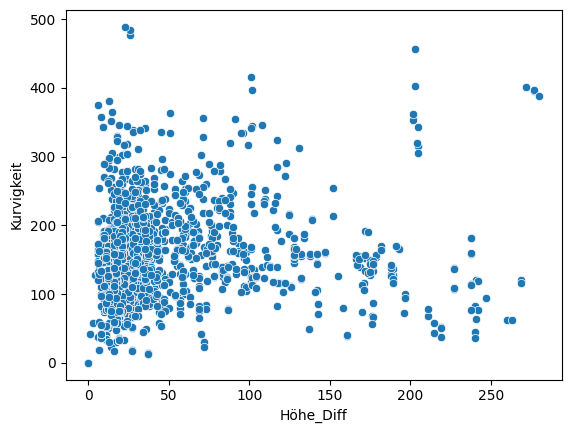

In [19]:
sns.scatterplot(data=df,
                y='Kurvigkeit',
                x='Höhe_Diff')